Importação das Bibliotecas

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

Dados de Máquinas agrícolas nos últimos 36 meses

In [9]:
dados = [
    52, 50, 36, 40, 30, 42, 38, 38, 52, 44, 36, 34,
    50, 42, 34, 55, 36, 55, 42, 52, 34, 48, 55, 44,
    44, 30, 48, 40, 40, 44, 40, 44, 38, 36, 50, 42,
]

Estatísticas Descritivas

In [10]:
media = np.mean(dados)
desvio = np.std(dados, ddof=1)

In [11]:
print("Média: ", f"{media:.6f}")
print("Erro padrão: ", f"{stats.sem(dados):.6f}")
print("Desvio padrão: ", f"{desvio:.6f}")
print("Variância: ", f"{np.var(dados, ddof=1):.6f}")
print("Mínimo: ", np.min(dados))
print("Máximo: ", np.max(dados))
print("Soma: ", np.sum(dados))
print("Contagem: ", len(dados))

Média:  42.638889
Erro padrão:  1.183318
Desvio padrão:  7.099911
Variância:  50.408730
Mínimo:  30
Máximo:  55
Soma:  1535
Contagem:  36


Comparação com os resultados do pdf disponibilizado

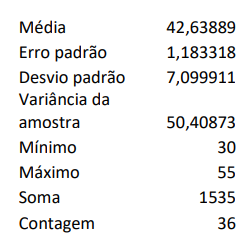

# Teste de Kolmogorov-Smirnov

O Teste de Kolmogorov-Smirnov é utilizado para verificar a aderência de uma amostra a uma distribuição específica. Neste caso, estamos testando se a produção segue uma distribuição normal.

## Hipóteses

- **Hipótese Nula (H0)**: A produção segue uma distribuição normal N(mu, sigma).
- **Hipótese Alternativa (H1)**: A produção não segue uma distribuição normal N(mu, sigma).

## Notação

- N(mu, sigma): Distribuição normal com média mu e desvio padrão sigma.


In [12]:
alfa = 0.05 #Nível de significância
Dc = 0.23 #Valor critico da estatística de Kolmogorov-Smirnov

Cálculo do Teste

In [13]:
D_calculado, p_valor = stats.kstest(dados, 'norm', args=(media, desvio))

Resultado do Teste de Kolmogorov-Smirnov

In [17]:
print("Estatística D calculada: ", f"{D_calculado:.6f}")
print("p-valor: ", f"{p_valor:.6f}")
print("Valor crítico (Dc): ", f"{Dc:.2f}")

Estatística D calculada:  0.118430
p-valor:  0.650279
Valor crítico (Dc):  0.23


In [15]:
if D_calculado < Dc:
    print("Não rejeitamos H0. A amostra pode ser considerada proveniente de uma população com distribuição normal.")
else:
    print("Rejeitamos H0. A amostra NÃO pode ser considerada proveniente de uma população com distribuição normal.")

Não rejeitamos H0. A amostra pode ser considerada proveniente de uma população com distribuição normal.


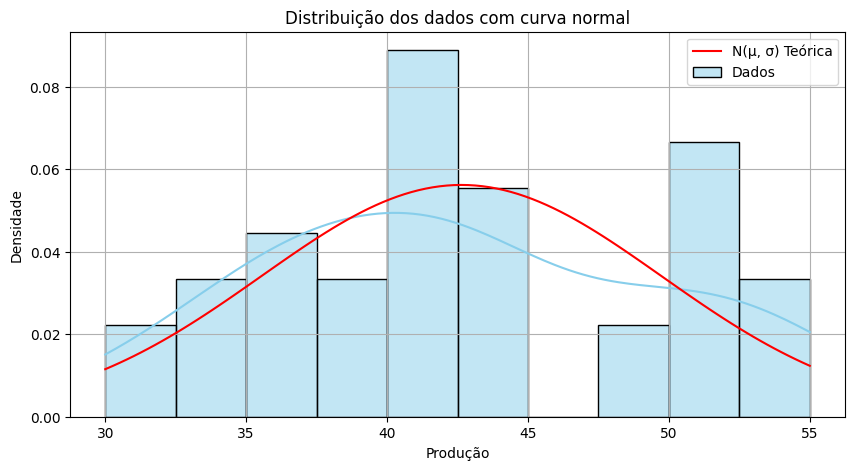

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(dados, kde=True, stat="density", bins=10, color="skyblue", label="Dados")

x = np.linspace(min(dados), max(dados), 100)
y = stats.norm.pdf(x, media, desvio)
plt.plot(x, y, color='red', label='N(μ, σ) Teórica')

plt.title("Distribuição dos dados com curva normal")
plt.xlabel("Produção")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()